In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [2]:
df = pd.read_csv('laptops.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')


In [3]:
df = df[['ram','storage','screen','final_price']]

In [4]:
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


<Axes: xlabel='final_price', ylabel='Count'>

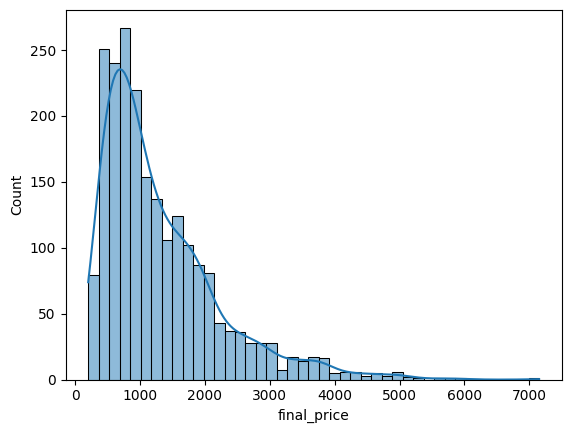

In [5]:
sns.histplot(df['final_price'],kde = True)


## Question One 


In [6]:
missing_values = df.isnull().sum()
missing_values


ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [7]:
missing_values > 0


ram            False
storage        False
screen          True
final_price    False
dtype: bool

## Question two 


In [8]:
df['ram'].median()


16.0

## Prepare and split the dataset


In [9]:
n = len(df)
idx = np.arange(n)

In [10]:
np.random.seed(42)
np.random.shuffle(idx)
df = df.iloc[idx].reset_index(drop=True)
df

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
2155,8,512,15.0,1838.29
2156,8,256,15.6,531.80
2157,8,256,13.3,765.33
2158,8,512,14.0,803.61


In [11]:

n_val = int (n * 0.2)
n_test = int (n * 0.2)
n_train = int(n * 0.6)


## QUESTION 3

## FILL WITH zero

In [12]:
df_train = df.iloc[idx[:n_train]].copy()
df_val=df.iloc[idx[n_train:n_train + n_val]].copy()
df_test= df.iloc[idx[n_train + n_val:]].copy()


In [13]:
mean_values = df_train[['ram', 'storage', 'screen']].mean()


In [14]:
X_train = df_train[['ram', 'storage', 'screen']].fillna(0).values
X_val = df_val[['ram', 'storage', 'screen']].fillna(0).values
X_test = df_test[['ram', 'storage', 'screen']].fillna(0).values


In [15]:
y_train=np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)


In [16]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [17]:
w0, w = train_linear_regression(X_train, y_train)


In [18]:
w0, w


(6.73531826904355, array([ 0.02624169,  0.0006957 , -0.03861175]))

## FILL WITH MEAN

In [19]:
X_train1 = df_train[['ram', 'storage', 'screen']].fillna(mean_values).values
X_val1 = df_val[['ram', 'storage', 'screen']].fillna(mean_values).values
X_test1 = df_test[['ram', 'storage', 'screen']].fillna(mean_values).values


In [20]:
w0 ,w = train_linear_regression(X_train1, y_train)


In [21]:
w0 , w


(6.732788041891629, array([ 0.02626154,  0.00069473, -0.03839705]))

In [22]:
y_pred = w0 + X_train.dot(w)


In [23]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


## RSME FOR ZERO FILLING

In [24]:
score = rmse(y_train, y_pred)
round(score, 2)


0.45

## RSME FOR MEAN FILLING

In [25]:
y_pred = w0 + X_train1.dot(w)

score = rmse(y_train, y_pred)
round(score, 2)



0.45

## Question 4


In [26]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])    
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]



In [27]:
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train,y_train, r=r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred)
    score = round(score,2)
    
    print(f"r = {r},  w0 = {w0},  score = {score}")


r = 0.0,  w0 = 6.73531826904355,  score = 0.42
r = 0.01,  w0 = 6.727398418693735,  score = 0.42
r = 0.1,  w0 = 6.65695258620368,  score = 0.42
r = 1,  w0 = 6.026226743368414,  score = 0.43
r = 5,  w0 = 4.243589689214551,  score = 0.48
r = 10,  w0 = 3.10175393375784,  score = 0.54
r = 100,  w0 = 0.5512842242417937,  score = 0.72


## Question 5


In [34]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_scores = []


In [35]:
for seed in seeds:
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[n_train:n_train + n_val].copy()
    df_test = df.iloc[n_train + n_val:].copy()
    
    X_train = df_train[['ram', 'storage', 'screen']].fillna(0).values
    y_train = np.log1p(df_train.final_price.values)
    X_val =  df_val[['ram', 'storage', 'screen']].fillna(0).values
    y_val =  np.log1p(df_val.final_price.values)
    
    w0, w = train_linear_regression(X_train, y_train)
    
    y_pred = w0 + X_val.dot(w)
    
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    
    print(f"Seed: {seed}, RMSE: {round(score, 3)}")


Seed: 0, RMSE: 0.42
Seed: 1, RMSE: 0.427
Seed: 2, RMSE: 0.427
Seed: 3, RMSE: 0.426
Seed: 4, RMSE: 0.423
Seed: 5, RMSE: 0.425
Seed: 6, RMSE: 0.421
Seed: 7, RMSE: 0.426
Seed: 8, RMSE: 0.421
Seed: 9, RMSE: 0.422


In [36]:
std = np.std(rmse_scores)
# std_rounded = round(std, 3)
print(f"\nStandard deviation of RMSE scores: {std_rounded}")


Standard deviation of RMSE scores: 0.003


## QUESTION 6


In [37]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [39]:
seed = 9

idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

In [40]:
df_train = df.iloc[idx[:n_train]].copy()
df_val = df.iloc[n_train:n_train + n_val].copy()
df_test = df.iloc[n_train + n_val:].copy()

In [41]:
df_new = pd.concat([df_train, df_val], axis=0)
df_new.fillna(0, inplace=True)

In [42]:
X_new = df_new[['ram', 'storage', 'screen']].values
y_new = np.log1p(df_new.final_price.values)

In [44]:
r = 0.001
w0, w = train_linear_regression_reg(X_new, y_new, r=r)

In [45]:
df_test.fillna(0, inplace=True)  # Fill missing values in test set with 0
X_test = df_test[['ram', 'storage', 'screen']].values
y_test = np.log1p(df_test.final_price.values)

In [46]:
y_pred = w0 + X_test.dot(w)

In [47]:
test_score = rmse(y_test, y_pred)
test_score = round(test_score, 2)

In [48]:
print(f"RMSE on the test set: {test_score}")

RMSE on the test set: 0.42
